In [1]:
from evaluation import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

/home/fe/hufe/miniconda3/envs/remote-sensing/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package wordnet to /home/fe/hufe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/fe/hufe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## This part is time consuming
The results get saved to a csv file which can be loaded later on

In [3]:
def get_stats(reference_paths, prediction_path):

    bleus = []
    meteors = []
    rouges = []
    percentage = []

    for i in range(9):
        print(i)
        
        bleu, meteor, rouge = eval_validation(references_path=reference_paths, prediction_path=prediction_path + f'/{i}')

        bleus.append(bleu)
        meteors.append(meteor)
        rouges.append(rouge)
        percentage.append((i+1)*5)
    return bleus, meteors, rouges, percentage

Put every run type into a list with the paths of the different runs.

In [1]:
# img_cluster = ['results2/cluster_image_0', 'results2/cluster_image_1', 'results2/cluster_image_2']
# text_cluster = ['results2/cluster_text_0', 'results2/cluster_text_1', 'results2/cluster_text_2']
# least_conf = ['results2/conf_least_0', 'results2/conf_least_1', 'results2/conf_least_2']
# margin_conf = ['results2/conf_margin_0', 'results2/conf_margin_1', 'results2/conf_margin_2']

# cluster_conf = ['results2/cluster+confidence_0', 'results2/cluster+confidence_1', 'results2/cluster+confidence_2']
# conf_cluster = ['results2/confidence+cluster_0', 'results2/confidence+cluster_1', 'results2/confidence+cluster_2']


# cluster_and_conf = ['results2/cluster&confidence_0', 'results2/cluster&confidence_1', 'results2/cluster&confidence_2']

# random = ['results2/random_0', 'results2/random_1', 'results2/random_2']
# full = 'results2/full_0'

your_runs = ['results2/your_runs_0', 'results2/your_runs_1', 'results2/your_runs_2']

specify which run you want to evaluate and under what name it should be saved 

In [4]:
reference_paths = [f"../evaluation/val_references_{i}.txt" for i in range(5)]

In [7]:
# THIS MAY TAKE A WHILE!

runs = [(your_runs, 'your runs')]

with tqdm(total=len(runs)) as pbar:
    stats = []
    for experiments, method in runs:
        for experiment in experiments:
            bleu, meteor, rouge, percentage = get_stats(reference_paths, experiment)
            df = pd.DataFrame({"bleu": bleu, "meteor": meteor, "rouge": rouge, "percentage": percentage,  "method": [method]*9})
            stats.append(df)
        pbar.update(1)


  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\Lorenz\miniconda3\envs\project_remote_sensing\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\Lorenz\miniconda3\envs\project_remote_sensing\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


0


c:\Users\Lorenz\miniconda3\envs\project_remote_sensing\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8


100%|██████████| 1/1 [07:30<00:00, 450.58s/it]


In [ ]:
# handle single full baseline differently - it doesnt have cycles, so we need to do it manually
bleu, meteor, rouge = eval_validation(references_path=reference_paths, prediction_path=full + '/0')
full_df = pd.DataFrame({"bleu": [bleu]*9, "meteor": [meteor]*9, "rouge": [rouge]*9, "percentage": [i * 5 for i in range(1,10)],  "method": 9*["full"]})

In [10]:
# concatenate all the dataframes
all = pd.concat((*stats,full_df))

In [13]:
all

,index,bleu,meteor,rouge,percentage,method,Unnamed: 0.1,Unnamed: 0
0,0,0.099477,0.441279,0.484752,5,cluster and conf,NaN,NaN
1,1,0.053092,0.413257,0.454238,10,cluster and conf,NaN,NaN
2,2,0.091354,0.448672,0.487142,15,cluster and conf,NaN,NaN
3,3,0.052222,0.423601,0.471734,20,cluster and conf,NaN,NaN
4,4,0.092512,0.440224,0.478038,25,cluster and conf,NaN,NaN
...,...,...,...,...,...,...,...,...
229,202,0.478000,0.337000,0.601000,25,MLCA-Net,202.0,NaN
230,203,0.478000,0.337000,0.601000,30,MLCA-Net,203.0,NaN
231,204,0.478000,0.337000,0.601000,35,MLCA-Net,204.0,NaN
232,205,0.478000,0.337000,0.601000,40,MLCA-Net,205.0,NaN


In [16]:
all.to_csv('all.csv')

In [23]:
all = pd.read_csv('all.csv')

In [21]:
color_palette = {
    'img cluster': 'blue',
    'least conf': 'green',
    'margin conf': 'gray',
    'random': 'orange',
    'text cluster': 'brown',
    'cluster conf': 'cyan',
    'conf cluster': 'purple',
    'full': 'tab:pink',
    'MLCA-Net': 'red',
    'cluster and conf': 'black'
}

In [29]:
all.method.unique()

array(['img cluster', 'least conf', 'margin conf', 'random',
       'text cluster', 'cluster conf', 'conf cluster', 'full', 'MLCA-Net'],
      dtype=object)

In [ ]:
sns.set_theme(style="ticks")
plt.figure(figsize=(30,7))

plt.subplot(1,3,1, title='Bleu')
sns.lineplot(data=all, x="percentage", y="bleu", hue="method")     

plt.subplot(1,3,2, title='Rouge')
sns.lineplot(data=all, x="percentage", y="rouge", hue="method")     

plt.subplot(1,3,3, title='Meteor')
sns.lineplot(data=all, x="percentage", y="meteor", hue="method")     
   

# plt.savefig('results/meteor.png')


<AxesSubplot: title={'center': 'Meteor'}, xlabel='percentage', ylabel='bleu'>

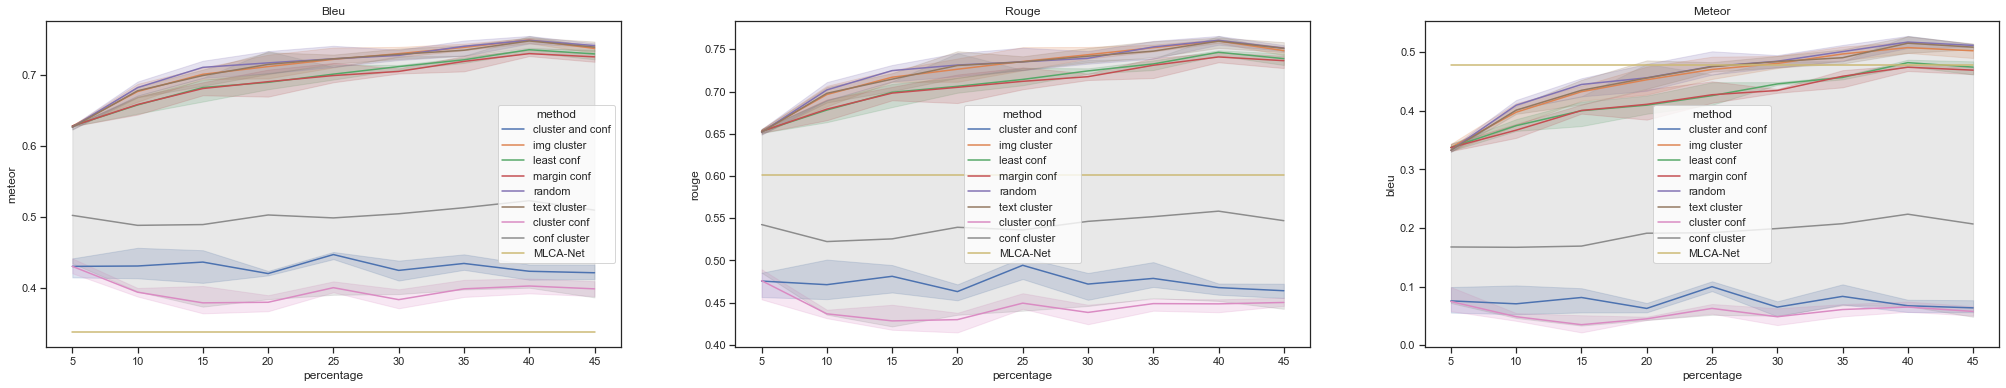

In [15]:
only_single = all[all['method'] != 'full']
only_single = only_single[only_single['method'] != 'cluster+confidence']
only_single = only_single[only_single['method'] != 'confidence+cluster']

sns.set_theme(style="ticks")
plt.figure(figsize=(35,6))

plt.subplot(1,3,1, title='Bleu')
sns.lineplot(data=only_single, x="percentage", y="meteor", hue="method")     

plt.subplot(1,3,2, title='Rouge')
sns.lineplot(data=only_single, x="percentage", y="rouge", hue="method")     

plt.subplot(1,3,3, title='Meteor')
sns.lineplot(data=only_single, x="percentage", y="bleu", hue="method")     

### SLIDE BASELINES

<AxesSubplot: title={'center': 'Bleu'}, xlabel='percentage', ylabel='bleu'>

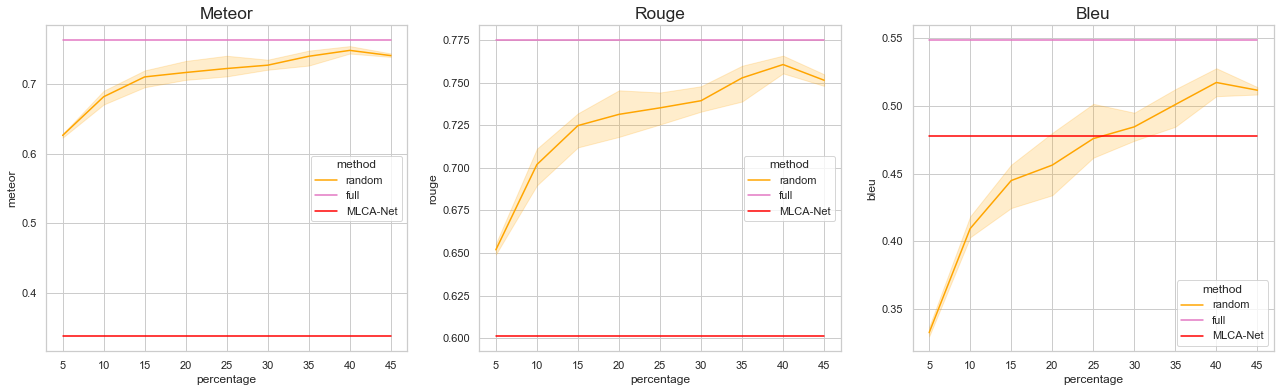

In [148]:
baselines = all[all['method'].isin(['full','random', 'MLCA-Net'])]

sns.set_theme(style="whitegrid")

plt.figure(figsize=(22, 6))
plt.rcParams.update({'axes.titlesize': 'x-large'})

plt.subplot(1,3,1, title='Meteor' )
sns.lineplot(data=baselines, x="percentage", y="meteor", hue="method", palette=color_palette)     

plt.subplot(1,3,2, title='Rouge')
sns.lineplot(data=baselines, x="percentage", y="rouge", hue="method", palette=color_palette)     

plt.subplot(1,3,3, title='Bleu')
sns.lineplot(data=baselines, x="percentage", y="bleu", hue="method", palette=color_palette)     

### SLIDE CONFIDENCE

<AxesSubplot: title={'center': 'Bleu'}, xlabel='percentage', ylabel='bleu'>

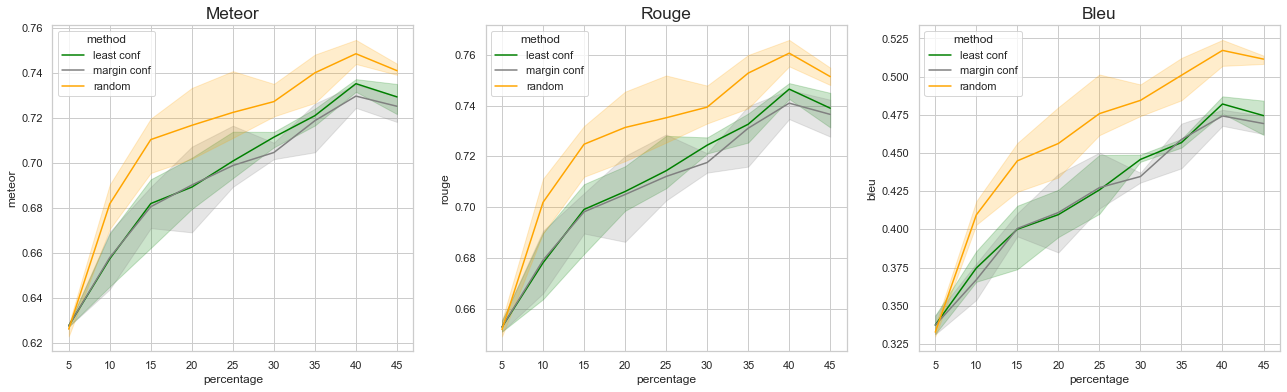

In [149]:
confidence = all[all['method'].isin(['random', 'least conf', 'margin conf'])]

sns.set_theme(style="whitegrid")

plt.figure(figsize=(22, 6))
plt.rcParams.update({'axes.titlesize': 'x-large'})

plt.subplot(1,3,1, title='Meteor' )
sns.lineplot(data=confidence, x="percentage", y="meteor", hue="method", palette=color_palette)     

plt.subplot(1,3,2, title='Rouge')
sns.lineplot(data=confidence, x="percentage", y="rouge", hue="method", palette=color_palette)     

plt.subplot(1,3,3, title='Bleu')
sns.lineplot(data=confidence, x="percentage", y="bleu", hue="method", palette=color_palette)     

### SLIDE CLUSTERING

<AxesSubplot: title={'center': 'Bleu'}, xlabel='percentage', ylabel='bleu'>

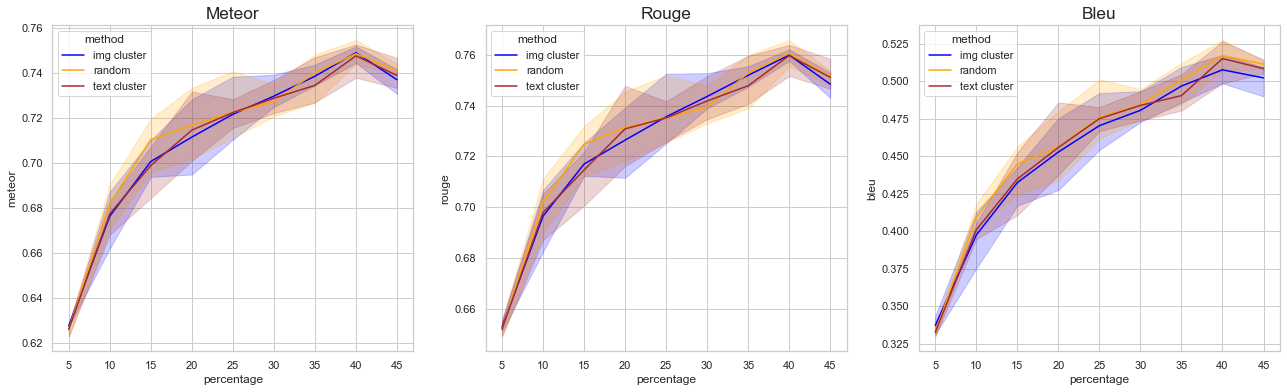

In [150]:
cluster = all[all['method'].isin(['random', 'img cluster', 'text cluster'])]

sns.set_theme(style="whitegrid")
plt.figure(figsize=(22, 6))

plt.rcParams.update({'axes.titlesize': 'x-large'})

plt.subplot(1,3,1, title='Meteor' )
sns.lineplot(data=cluster, x="percentage", y="meteor", hue="method", palette=color_palette)     

plt.subplot(1,3,2, title='Rouge')
sns.lineplot(data=cluster, x="percentage", y="rouge", hue="method", palette=color_palette)     

plt.subplot(1,3,3, title='Bleu')
sns.lineplot(data=cluster, x="percentage", y="bleu", hue="method", palette=color_palette)

### SLIDE FUSION

<AxesSubplot: title={'center': 'Bleu'}, xlabel='percentage', ylabel='bleu'>

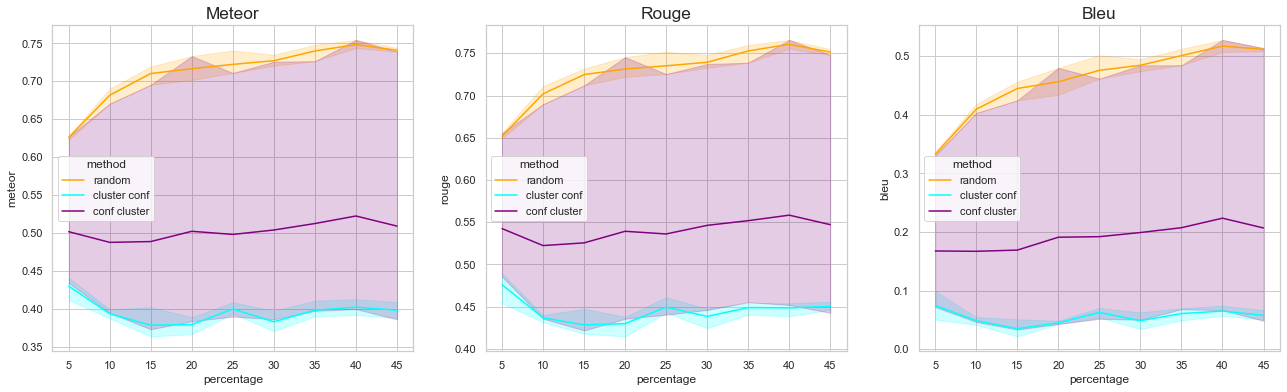

In [24]:
fusion = all[all['method'].isin(['random', 'conf cluster', 'cluster conf', 'cluster and conf'])]

sns.set_theme(style="whitegrid")
plt.figure(figsize=(22, 6))

plt.rcParams.update({'axes.titlesize': 'x-large'})

plt.subplot(1,3,1, title='Meteor' )
sns.lineplot(data=fusion, x="percentage", y="meteor", hue="method", palette=color_palette)     

plt.subplot(1,3,2, title='Rouge')
sns.lineplot(data=fusion, x="percentage", y="rouge", hue="method", palette=color_palette)     

plt.subplot(1,3,3, title='Bleu')
sns.lineplot(data=fusion, x="percentage", y="bleu", hue="method", palette=color_palette)

<AxesSubplot: title={'center': 'Bleu'}, xlabel='percentage', ylabel='bleu'>

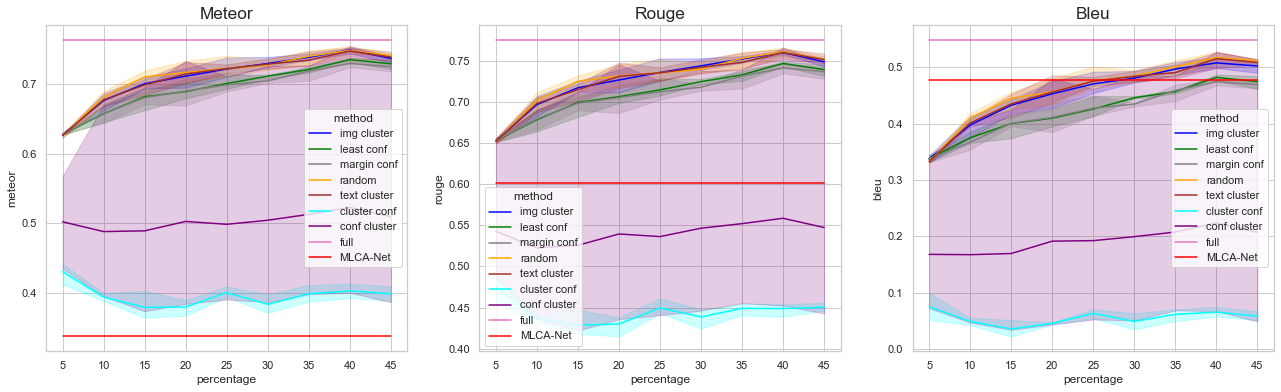

In [154]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(22, 6))
plt.rcParams.update({'axes.titlesize': 'x-large'})

plt.subplot(1,3,1, title='Meteor' )
sns.lineplot(data=all, x="percentage", y="meteor", hue="method", palette=color_palette)     

plt.subplot(1,3,2, title='Rouge')
sns.lineplot(data=all, x="percentage", y="rouge", hue="method", palette=color_palette)     

plt.subplot(1,3,3, title='Bleu')
sns.lineplot(data=all, x="percentage", y="bleu", hue="method", palette=color_palette)     